# Some simple non-linear regression models

Here I will explore some basic extensions of the linear regression to perform non-linear regressions.

In [29]:
from math import *
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

## Data

I will use essentially fake data to illustrate the different methods.

### 1-D relationship
Let us start with the following relationship :

$$ y = 2x+\frac{1.5x^3}{e^{x/2}}+5sin(\frac{\pi x}{2})+3sin(\pi x) +\varepsilon $$

where $\varepsilon \sim \cal N (0,1)$ is a random noise.

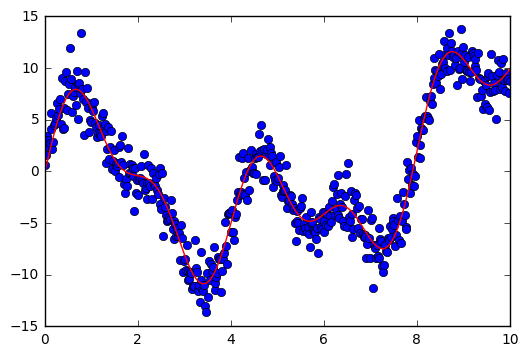

In [40]:
nsamples=500
x_train = np.linspace(0,10,nsamples)
y_true = 2*x_train-1.5*x_train**3/np.exp(x_train/2)+5*np.sin(pi*x_train/2)+3*np.sin(pi*x_train)
y_train = y_true+np.random.normal(scale = 1.5,size = len(y_true))
plt.plot(x_train,y_train,'o',x_train,y_true,'r-')

Now we need to create a test set, and a metric to evaluate the performance of the regression model.

In [53]:
x_test = np.sort(np.random.uniform(0,10,100))
y_test = 2*x_test-1.5*x_test**3/np.exp(x_test/2)+5*np.sin(pi*x_test/2)+3*np.sin(pi*x_test)
def rmse(y_pred,y=y_test):
    return sum((y_pred-y)**2)/len(y_pred)

## Polynomial regression

Let us start with a simple polynomial regression of the form :

$$ y = \sum_{i=1}^p \alpha_i x^i $$

The maximum degree of the polynomials is a hyperparameter that need to be chosen according to the performance on the test set.

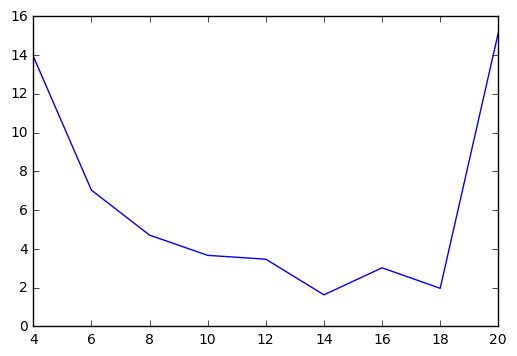

In [60]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
degree = np.arange(4,22,2)

perf = []
pred = np.ndarray((len(x_test),len(degree)))
for i,d in enumerate(degree): 
    model = make_pipeline(PolynomialFeatures(degree=d),LinearRegression())
    #note : the reshape operation is due to a deprecation in sklearn : 1d array are no longer accepted as inputs.
    model.fit(x_train.reshape(-1,1),y_train)
    pred[:,i] = model.predict(x_test.reshape(-1,1))
    perf.append(rmse(pred[:,i]))

plt.plot(degree,perf)

Best performance is obtained with a polynomial of order 14, which seems to be a lot. After $p=18$, the model overfits quickly.

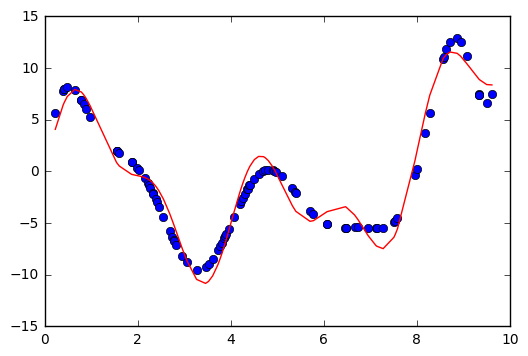

In [65]:
plt.plot(x_test,pred[:,5],'o',x_test,y_test,'-r')

Not too bad.

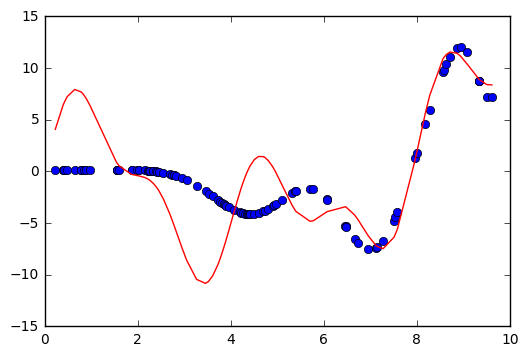

In [64]:
plt.plot(x_test,pred[:,len(degree)-1],'o',x_test,y_test,'-r')

This one is unable to reproduce the bahavior at small x.

## Local regression (LOESS)

## Boosting

## Splines

## Boosted splines